# Forecasting IBM Stock Prices (1985–2025)

This notebook compares forecasting models (ARIMA, Prophet, Naïve) on IBM historical stock data.


In [8]:
import sys
import os

In [9]:
sys.path.append(os.path.abspath("../src"))

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import Preprocessor
from forecasting import Forecaster

## 1. Data Preprocessing

In [11]:
preprocessor = Preprocessor("../data/raw/IBM_Stock_1980_2025.csv")

df = preprocessor.load_data()
df = preprocessor.add_features()

train, test = preprocessor.split(test_size=0.2)

df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Adj Factor,Daily_Return,Cumulative_Return,SMA_30,SMA_100,EMA_30,EMA_100,Volatility_30d,BB_Mid,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,,,,,,,
2025-07-24,261.250000,262.049988,252.750000,260.510010,260.510010,22647700,0.0,0.0,1.0,-0.076238,268.722515,285.320334,259.747270,280.563528,263.605410,0.017962,285.837503,300.414279,271.260727
2025-07-25,260.019989,260.799988,256.350006,259.720001,259.720001,7758700,0.0,0.0,1.0,-0.003033,267.904569,284.593668,259.859437,279.218785,263.528472,0.017523,284.227003,302.594152,265.859855
2025-07-28,260.299988,264.000000,259.609985,263.209991,263.209991,5192500,0.0,0.0,1.0,0.013438,271.517977,283.999667,259.976507,278.185959,263.522165,0.017764,282.902502,303.314561,262.490444
2025-07-29,264.299988,265.799988,261.019989,262.410004,262.410004,4627300,0.0,0.0,1.0,-0.003039,270.689699,283.506001,260.104052,277.168156,263.500142,0.017632,281.284003,302.832354,259.735651
2025-07-30,261.600006,262.000000,258.899994,260.260010,260.260010,3718300,0.0,0.0,1.0,-0.008193,268.463674,282.787002,260.236517,276.077308,263.435981,0.017323,279.737003,302.684959,256.789047


## 2. Data Visualization

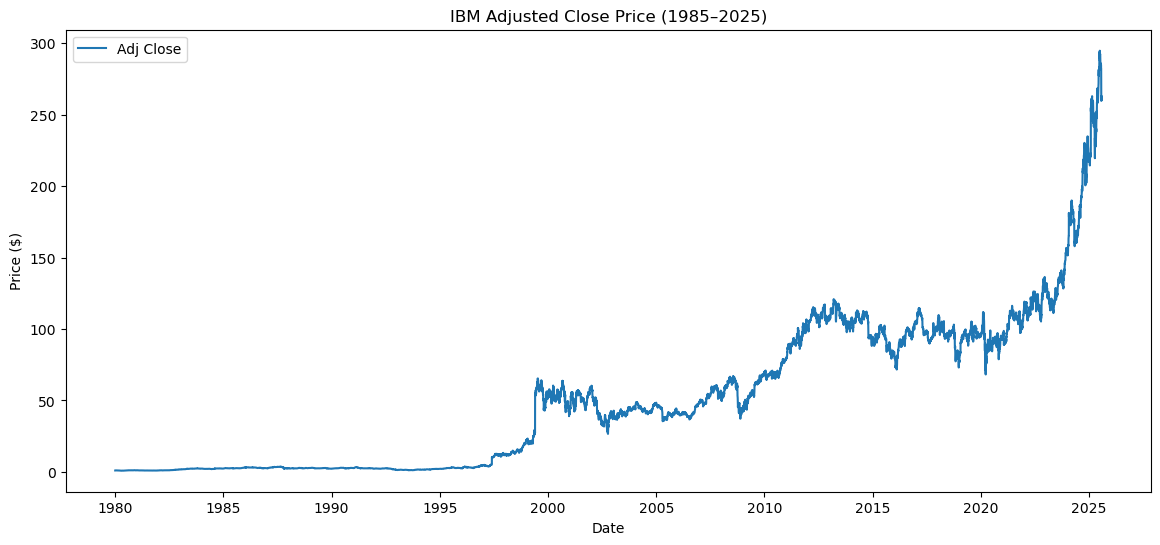

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["Adj Close"], label="Adj Close")
plt.title("IBM Adjusted Close Price (1985–2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


## 3. Naïve (Persistence) Forecast

[Naïve Model] MAPE: 18.30%, RMSE: 53.81


c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = self.test[self.target_col]


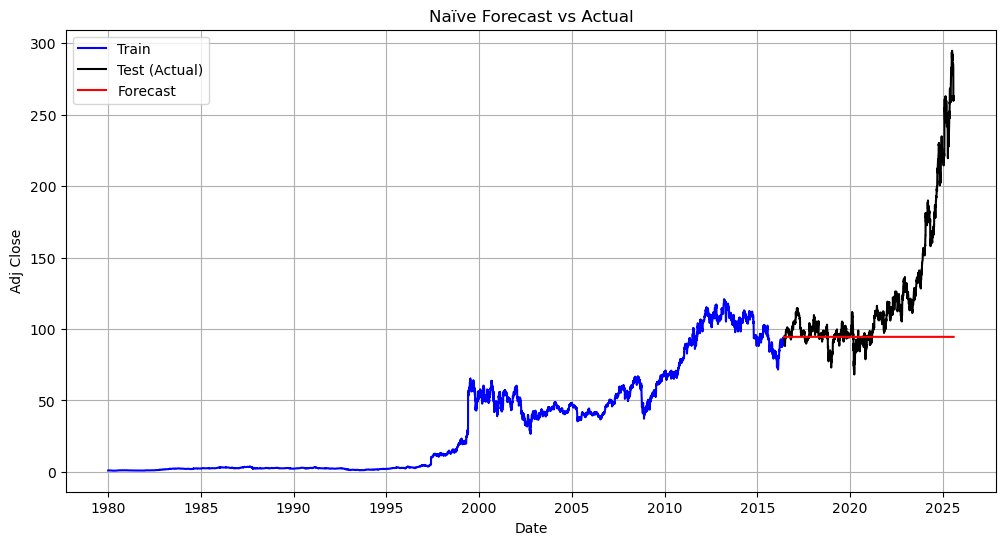

In [13]:
naive_forecaster = Forecaster(train, test, target_col="Adj Close")
preds_naive = naive_forecaster.forecast_naive()
mape_naive = naive_forecaster.evaluate("mape")
rmse_naive = naive_forecaster.evaluate("rmse")

print(f"[Naïve Model] MAPE: {mape_naive:.2f}%, RMSE: {rmse_naive:.2f}")

naive_forecaster.plot_forecast("Naïve Forecast vs Actual")


## 4. ARIMA Forecast

c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = self.test[self.target_col]
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site

[ARIMA(2,1,2)] MAPE: 18.32%, RMSE: 53.84


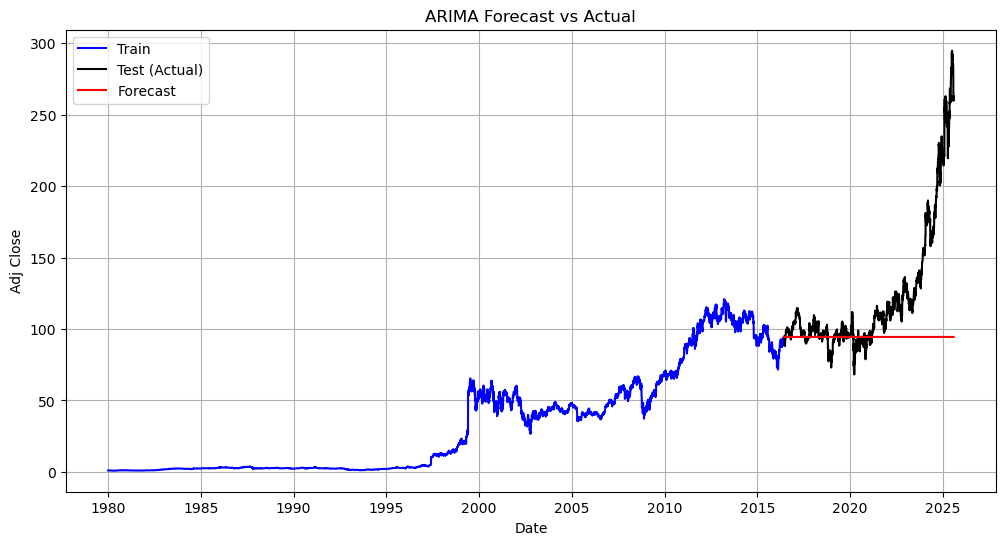

In [14]:
arima_forecaster = Forecaster(train, test, target_col="Adj Close")
preds_arima = arima_forecaster.forecast_arima(order=(2, 1, 2))

mape_arima = arima_forecaster.evaluate("mape")
rmse_arima = arima_forecaster.evaluate("rmse")

print(f"[ARIMA(2,1,2)] MAPE: {mape_arima:.2f}%, RMSE: {rmse_arima:.2f}")

arima_forecaster.plot_forecast("ARIMA Forecast vs Actual")

## 5. Prophet Forecast

c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = self.test[self.target_col]
15:34:02 - cmdstanpy - INFO - Chain [1] start processing
15:34:05 - cmdstanpy - INFO - Chain [1] done processing


[Prophet] MAPE: 28.60%, RMSE: 38.99


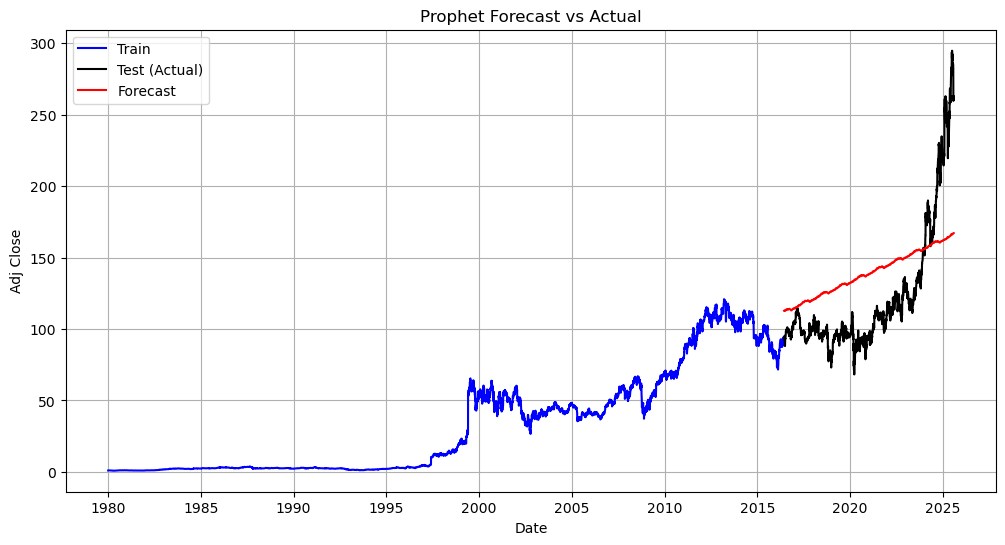

In [15]:
prophet_forecaster = Forecaster(train, test, target_col="Adj Close")
preds_prophet = prophet_forecaster.forecast_prophet()

mape_prophet = prophet_forecaster.evaluate("mape")
rmse_prophet = prophet_forecaster.evaluate("rmse")

print(f"[Prophet] MAPE: {mape_prophet:.2f}%, RMSE: {rmse_prophet:.2f}")

prophet_forecaster.plot_forecast("Prophet Forecast vs Actual")

## 6. Model Comparison

In [16]:
results = pd.DataFrame({
    "Model": ["Naïve", "ARIMA(2,1,2)", "Prophet"],
    "MAPE (%)": [mape_naive, mape_arima, mape_prophet],
    "RMSE": [rmse_naive, rmse_arima, rmse_prophet]
})

results.sort_values("MAPE (%)", inplace=True)
results.reset_index(drop=True, inplace=True)
results

,Model,MAPE (%),RMSE
0,Naïve,18.301484,53.813086
1,"ARIMA(2,1,2)",18.324747,53.841638
2,Prophet,28.603132,38.989281


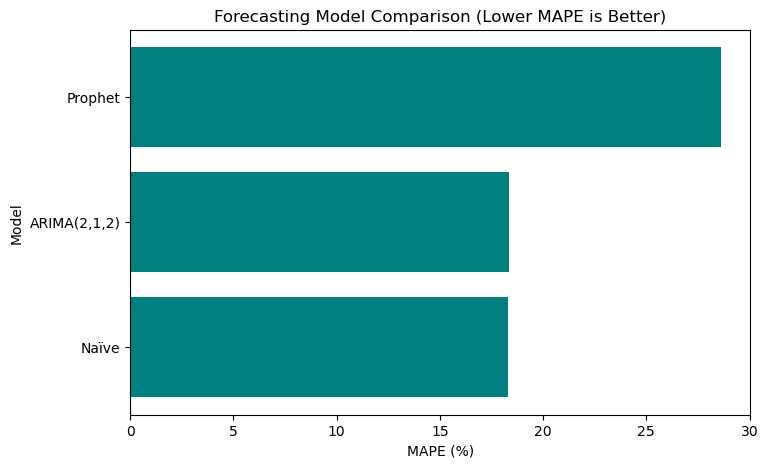

In [17]:
plt.figure(figsize=(8,5))
plt.barh(results["Model"], results["MAPE (%)"], color="teal")
plt.title("Forecasting Model Comparison (Lower MAPE is Better)")
plt.xlabel("MAPE (%)")
plt.ylabel("Model")
plt.show()

## Naïve forecasting with log-transform

In [18]:
forecaster_log = Forecaster(train, test, target_col="Adj Close", log_transform=True)

c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = np.log1p(self.test[self.target_col])


[Naïve] RMSE (log-transformed): 53.81


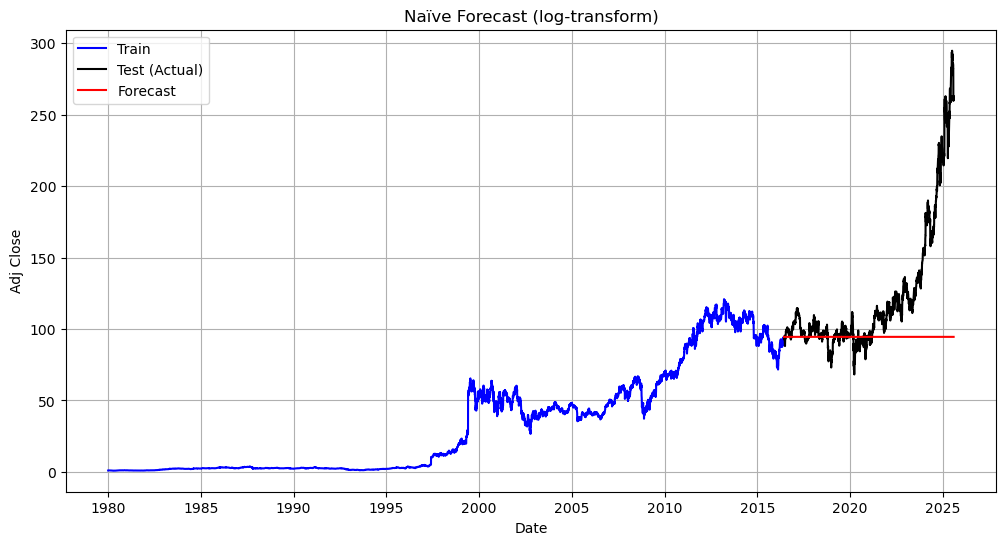

In [19]:
pred_naive = forecaster_log.forecast_naive()
rmse_naive = forecaster_log.evaluate("rmse")
print(f"[Naïve] RMSE (log-transformed): {rmse_naive:.2f}")
forecaster_log.plot_forecast("Naïve Forecast")

## ARIMA forecast with log-transform

c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = np.log1p(self.test[self.target_col])
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\clemm\miniconda3\envs\IBM-en

ARIMA RMSE (log-transformed): 53.81


c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\clemm\miniconda3\envs\IBM-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


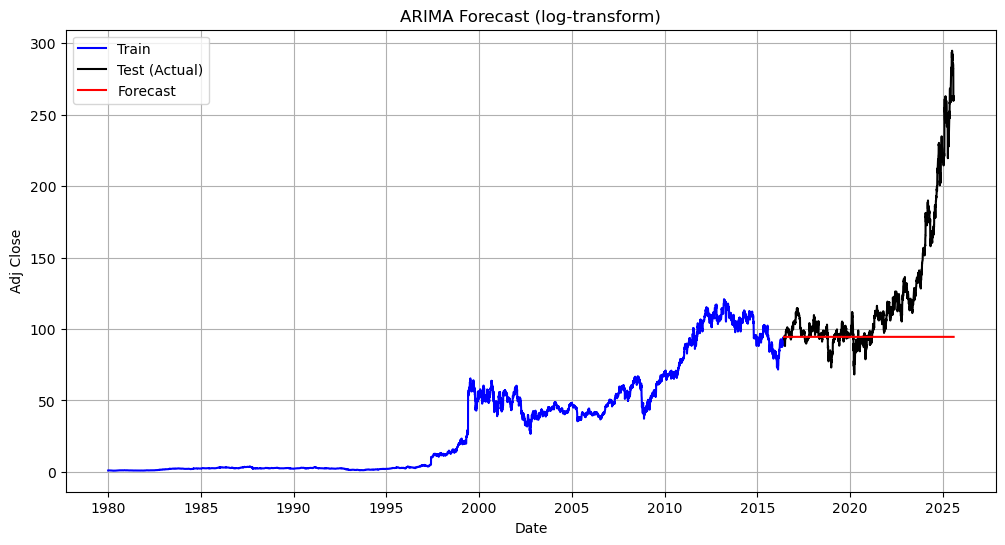

In [27]:
forecaster_log = Forecaster(train, test, target_col="Adj Close", log_transform=True)
pred_arima = forecaster_log.forecast_arima(order=(2,1,2))
rmse_arima = forecaster_log.evaluate("rmse")
print(f"ARIMA RMSE (log-transformed): {rmse_arima:.2f}")
forecaster_log.plot_forecast("ARIMA Forecast")


## Prophet forecast (log-transformed)

c:\Users\clemm\Documents\Personnal Projects\ibm-stock-prices\src\forecasting.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test["_y"] = np.log1p(self.test[self.target_col])
15:34:59 - cmdstanpy - INFO - Chain [1] start processing
15:35:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE (log-transformed): 52.56


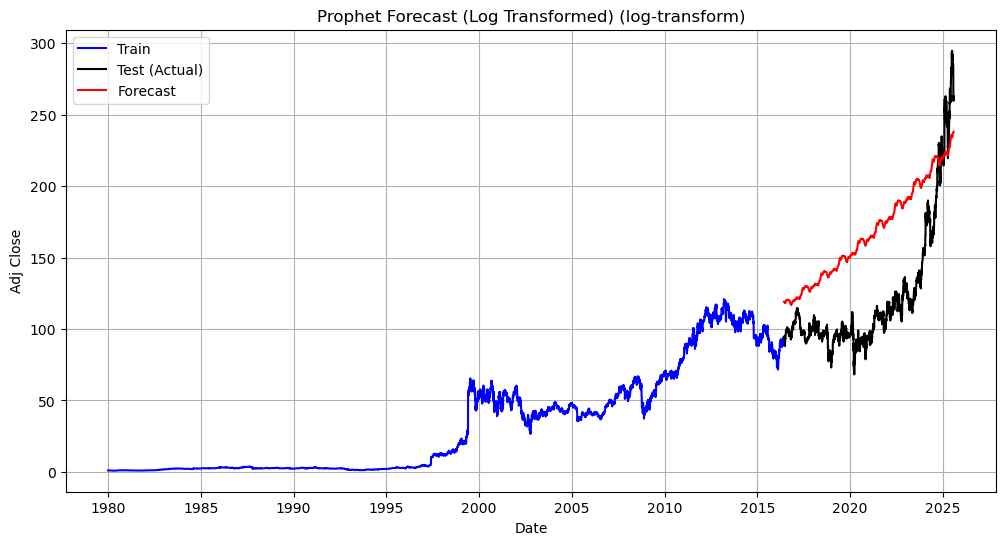

In [25]:
forecaster_log = Forecaster(train, test, target_col="Adj Close", log_transform=True)
pred_prophet = forecaster_log.forecast_prophet()
rmse_prophet = forecaster_log.evaluate("rmse")
print(f"Prophet RMSE (log-transformed): {rmse_prophet:.2f}")
forecaster_log.plot_forecast("Prophet Forecast (Log Transformed)")